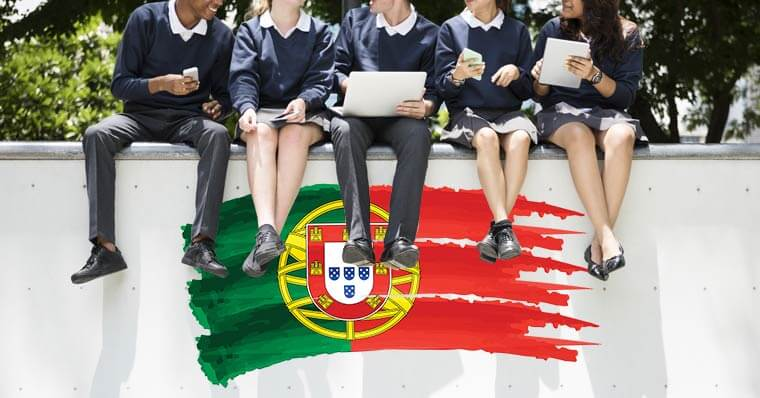

## **Consumo de alcohol en estudiantes**


---


**Estudiantes:**

* Johan Sebastian Galvis - 2211904

* John Dairo Calderón - 2211876

* Diego Alexander Guerrero - 2211895


---


**Docente:** Eliana Martha Bonalde Marcano


---


Estadistica I

Grupo E1

Universidad Industrial de Santander

2024

---


```
Kaggle: https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
```



## Introducción
El consumo de alcohol entre adolescentes es un fenómeno que preocupa a educadores, padres y profesionales de la salud debido a su impacto en el rendimiento académico, el desarrollo personal y la salud a largo plazo. Entender los factores que influyen en este comportamiento es esencial para diseñar políticas educativas y programas de intervención que fomenten estilos de vida más saludables.

El presente proyecto se centra en el conjunto de datos Student Alcohol Consumption de Kaggle, originalmente parte del proyecto de UCI Machine Learning Repository, proporciona información valiosa para analizar estas dinámicas. Los datos se recopilaron mediante encuestas aplicadas a estudiantes de secundaria en Portugal como parte de un estudio más amplio sobre el rendimiento académico. Este conjunto de datos incluye detalles sobre las características personales, sociales, familiares y escolares de los estudiantes, junto con información sobre el consumo de alcohol.

El objetivo de este proyecto es analizar las variables presentes en el dataset para identificar patrones y relaciones significativas entre el consumo de alcohol y otros factores como el rendimiento académico, las relaciones familiares y las actividades extracurriculares. A través de este análisis, se espera obtener una comprensión más profunda de los factores que influyen en el comportamiento de los estudiantes y su impacto en su vida académica y personal.

## Conjunto de datos

### Contenido del dataset


```
school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math or Portuguese:

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)
```



### Load libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score
from sklearn.preprocessing import LabelEncoder

from scipy.stats import shapiro
from scipy.stats import kstest

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Esta celda carga un archivo CSV que contiene datos relacionados con el análisis de estudiantes desde una ubicación en Google Drive y muestra las primeras cinco filas del DataFrame. Esto permite verificar si los datos se cargaron correctamente y observar la estructura general del conjunto de datos.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Estadistica/student-full.csv', encoding='latin-1', low_memory= False)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Limpieza y ajuste de datos

El propósito de esta celda es enriquecer el conjunto de datos con una nueva columna de fechas aleatorias que se encuentran dentro del año 2016. Esto es útil ya que el análisis requiere un contexto temporal. Tambien se agregó la columna de promedio de notas para tener un análisis más general.



In [ ]:
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2016-12-31')

num_days = (end_date - start_date).days + 1
random_days = np.random.randint(0, num_days, size=len(df))
random_dates = start_date + pd.to_timedelta(random_days, unit='D')

df['Fecha'] = random_dates
df['GProm'] = (df['G1'] + df['G2'] + df['G3']) / 3

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Fecha,GProm
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,4,0,11,11,2016-06-10,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,2,9,11,11,2016-12-07,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,6,12,13,12,2016-05-13,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,0,14,14,14,2016-11-03,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,0,11,13,13,2016-09-11,12.333333


Proporciona una descripción técnica del conjunto de datos para evaluar la calidad y estructura del DataFrame:

* Detectar columnas con valores nulos.
* Identificar los tipos de datos para preparar ajustes o transformaciones.
* Verificar si el tamaño del DataFrame es manejable en términos de memoria.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   school      1044 non-null   object        
 1   sex         1044 non-null   object        
 2   age         1044 non-null   int64         
 3   address     1044 non-null   object        
 4   famsize     1044 non-null   object        
 5   Pstatus     1044 non-null   object        
 6   Medu        1044 non-null   int64         
 7   Fedu        1044 non-null   int64         
 8   Mjob        1044 non-null   object        
 9   Fjob        1044 non-null   object        
 10  reason      1044 non-null   object        
 11  guardian    1044 non-null   object        
 12  traveltime  1044 non-null   int64         
 13  studytime   1044 non-null   int64         
 14  failures    1044 non-null   int64         
 15  schoolsup   1044 non-null   object        
 16  famsup      1044 non-nul

El comando se utiliza para:

* Entender rápidamente la distribución de las columnas numéricas.
* Identificar posibles anomalías como valores extremos o datos faltantes.
* Planificar ajustes o normalizaciones basadas en las estadísticas básicas.

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Fecha,GProm
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,2016-06-30 10:55:10.344827648,11.267241
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2016-01-01 00:00:00,1.333333
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,2016-04-02 18:00:00,9.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,2016-06-29 00:00:00,11.333333
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,2016-09-24 00:00:00,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,2016-12-31 00:00:00,19.333333
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,NaN,3.218805


Se evidencia que el promedio de las notas fue inferior al minimo para aprobar cada periodo.

## Análisis exploratorios

Suponiendo que se necesite aprobar el 60% del ciclo escolar para aprobar.

In [ ]:
for school in df['school'].unique():
    school_df = df[df['school'] == school]
    total_students = len(school_df)
    passed_students = len(school_df[school_df['GProm'] >= 12])
    print(f'{school}: de {total_students} estudiantes aprobaron {passed_students}')

GP: de 772 estudiantes aprobaron 373
MS: de 272 estudiantes aprobaron 84


Se evidencia que el promedio de las notas fue inferior al minimo para aprobar cada periodo.

In [ ]:
mean_g3 = df['G3'].mean()
mean_g2 = df['G2'].mean()
mean_g1 = df['G1'].mean()

mean_gProm = df['GProm'].mean()

print(f"La media de la nota G3 de todo el conjunto de datos es: {mean_g3}")
print(f"La media de la nota G2 de todo el conjunto de datos es: {mean_g2}")
print(f"La media de la nota G1 de todo el conjunto de datos es: {mean_g1}")

print(f"La media de la nota final GProm de todo el conjunto de datos es: {mean_gProm}")

La media de la nota G3 de todo el conjunto de datos es: 11.341954022988507
La media de la nota G2 de todo el conjunto de datos es: 11.246168582375478
La media de la nota G1 de todo el conjunto de datos es: 11.21360153256705
La media de la nota final GProm de todo el conjunto de datos es: 11.267241379310345


El siguiente modelo toma en cuenta ciertas características y permite hacer predicciones sobre el consumo de alcohol tanto en días laborales como en fines de semana.

In [ ]:
features = ['age', 'sex', 'school', 'studytime', 'romantic', 'freetime', 'goout', 'health', 'G1', 'G2', 'G3']
X = df[features]

# Convertir las variables categóricas a variables dummy
X = pd.get_dummies(X, drop_first=True)

# Dalc prediction
y_dalc = df['Dalc']
X_train, X_test, y_train_dalc, y_test_dalc = train_test_split(X, y_dalc, test_size=0.3, random_state=42, stratify=y_dalc)

rf_dalc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_dalc.fit(X_train, y_train_dalc)

y_pred_dalc = rf_dalc.predict(X_test)

accuracy_dalc = accuracy_score(y_test_dalc, y_pred_dalc)
conf_matrix_dalc = confusion_matrix(y_test_dalc, y_pred_dalc)
class_report_dalc = classification_report(y_test_dalc, y_pred_dalc, zero_division=1)  # zero_division parameter

# Imprimir los resultados de Dalc
print(f"Accuracy para Dalc: {accuracy_dalc:.4f}")
print("Matriz de Confusión para Dalc:")
print(conf_matrix_dalc)
print("\nReporte de Clasificación para Dalc:")
print(class_report_dalc)

# Walc prediction
y_walc = df['Walc']
X_train, X_test, y_train_walc, y_test_walc = train_test_split(X, y_walc, test_size=0.3, random_state=42, stratify=y_walc)

rf_walc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_walc.fit(X_train, y_train_walc)

y_pred_walc = rf_walc.predict(X_test)

accuracy_walc = accuracy_score(y_test_walc, y_pred_walc)
conf_matrix_walc = confusion_matrix(y_test_walc, y_pred_walc)
class_report_walc = classification_report(y_test_walc, y_pred_walc, zero_division=1)  # zero_division parameter

# Imprimir los resultados de Walc
print(f"Accuracy para Walc: {accuracy_walc:.4f}")
print("Matriz de Confusión para Walc:")
print(conf_matrix_walc)
print("\nReporte de Clasificación para Walc:")
print(class_report_walc)

Accuracy para Dalc: 0.7166
Matriz de Confusión para Dalc:
[[205   9   3   0   1]
 [ 44  14   1   0   0]
 [ 15   1   5   0   0]
 [  4   2   1   0   1]
 [  6   1   0   0   1]]

Reporte de Clasificación para Dalc:
              precision    recall  f1-score   support

           1       0.75      0.94      0.83       218
           2       0.52      0.24      0.33        59
           3       0.50      0.24      0.32        21
           4       1.00      0.00      0.00         8
           5       0.33      0.12      0.18         8

    accuracy                           0.72       314
   macro avg       0.62      0.31      0.33       314
weighted avg       0.68      0.72      0.67       314

Accuracy para Walc: 0.4904
Matriz de Confusión para Walc:
[[90 15 10  5  0]
 [31 20 14  5  1]
 [26 11 17  5  1]
 [ 8  7  5 18  3]
 [ 2  3  2  6  9]]

Reporte de Clasificación para Walc:
              precision    recall  f1-score   support

           1       0.57      0.75      0.65       120
     

Probar el modelo.

In [ ]:
student_data = {
    'age': [19],
    'sex': [1],
    'school': ['GP'],
    'studytime': [2],
    'romantic': [0],
    'freetime': [5],
    'goout': [4],
    'health': [1],
    'G1': [9],
    'G2': [0],
    'G3': [7]
}

example_df = pd.DataFrame(student_data)
# Convertir las variables categóricas a variables dummy
example_df = pd.get_dummies(example_df, drop_first=True)
example_df = example_df.reindex(columns=X.columns, fill_value=0)

predicted_dalc = rf_dalc.predict(example_df)
predicted_walc = rf_walc.predict(example_df)

print(f"Predicción del nivel de alcohol en días laborales (Dalc): {predicted_dalc[0]}")
print(f"Predicción del nivel de alcohol en fines de semana (Walc): {predicted_walc[0]}")

Predicción del nivel de alcohol en días laborales (Dalc): 1
Predicción del nivel de alcohol en fines de semana (Walc): 3


## Visualización de las variables

### 1. Distribución del consumo diario de alcohol

**Propósito:** El objetivo principal de esta gráfica es analizar la distribución de los niveles de consumo de alcohol entre estudiantes en dos períodos diferentes:

* Días laborales (Dalc).
* Fines de semana (Walc).

Esto permite identificar patrones en el comportamiento de los estudiantes respecto al consumo de alcohol según el día de la semana.

**Análisis:**
* Predomina el nivel de consumo 1 (bajo consumo), lo que sugiere que la mayoría de los estudiantes consumen poco alcohol en días de trabajo o estudio.
La frecuencia disminuye a medida que aumentan los niveles de consumo.


* Aunque el nivel 1 sigue siendo el más frecuente en ambos períodos, la gráfica revela que en niveles de consumo más altos (2, 3, 4, 5), el consumo de alcohol durante los días laborales es mayor. Esto podría indicar una tendencia preocupante de estudiantes que consumen alcohol de manera significativa incluso entre semana, a pesar de las responsabilidades académicas o laborales.

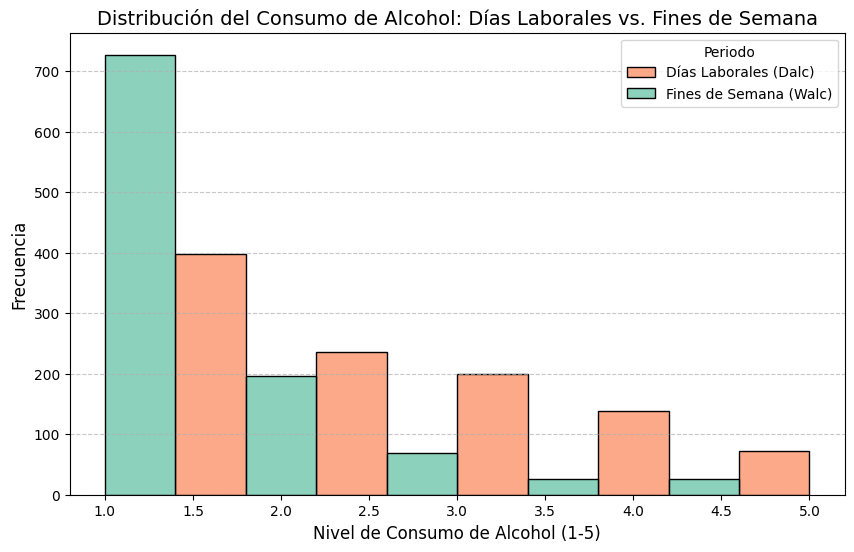

In [ ]:
df_long = df.melt(value_vars=['Dalc', 'Walc'], var_name='Periodo', value_name='Consumo de Alcohol')

plt.figure(figsize=(10, 6))
sns.histplot(data=df_long, x='Consumo de Alcohol', hue='Periodo', multiple='dodge', bins=5, palette='Set2', kde=False)
plt.title("Distribución del Consumo de Alcohol: Días Laborales vs. Fines de Semana", fontsize=14)
plt.xlabel("Nivel de Consumo de Alcohol (1-5)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title='Periodo', labels=['Días Laborales (Dalc)', 'Fines de Semana (Walc)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2. Distribución de alcohol a partir del género

**Propósito:** El propósito de este gráfico es comparar el consumo de alcohol en días laborales (Dalc) y en fines de semana (Walc) entre géneros (mujeres vs hombres). Este tipo de análisis puede ayudar a identificar si existen diferencias de género en cuanto al consumo de alcohol durante la semana laboral y los fines de semana.

**Análisis:**

* El gráfico muestra que el consumo promedio es mayor en hombres tanto en días laborales como en fines de semana, esto podría sugerir diferencias en los patrones de comportamiento entre ambos géneros.

* Se espera observar si hay una tendencia de consumo más alto en los fines de semana en comparación con los días laborales, así como si esta tendencia es más pronunciada en algún género.

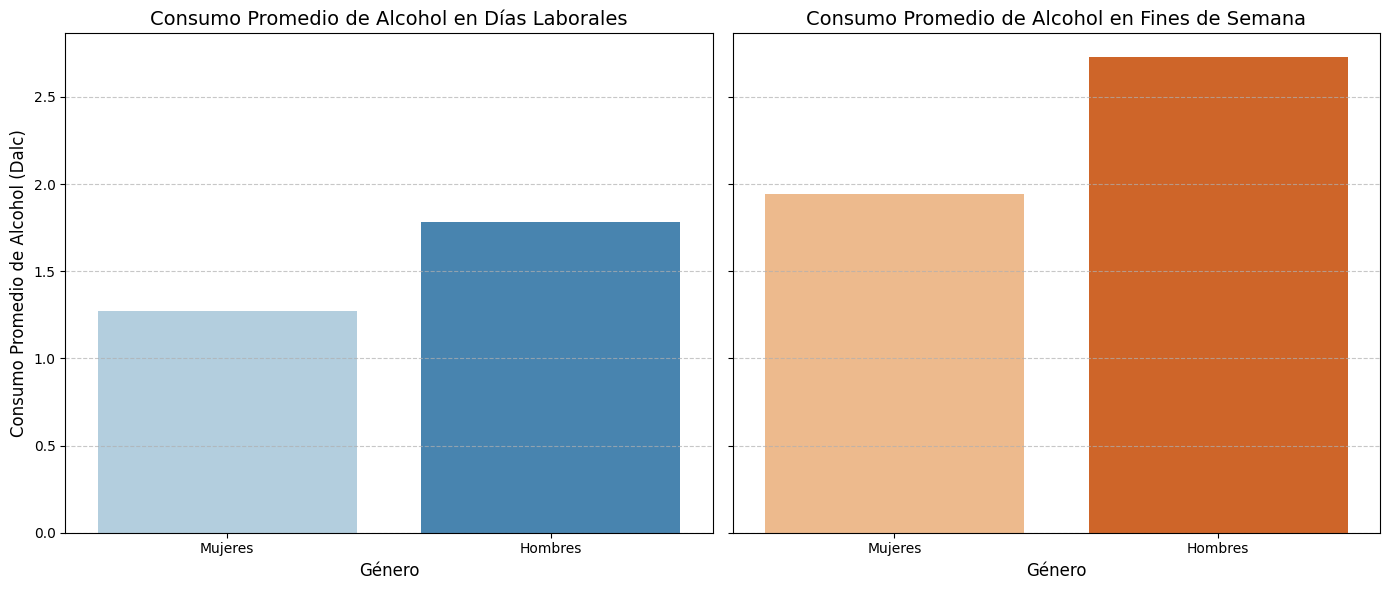

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico para Dalc
sns.barplot(ax=axes[0], data=df, x='sex', y='Dalc', hue='sex', errorbar=None, palette='Blues', legend=False )
axes[0].set_title("Consumo Promedio de Alcohol en Días Laborales", fontsize=14)
axes[0].set_xlabel("Género", fontsize=12)
axes[0].set_ylabel("Consumo Promedio de Alcohol (Dalc)", fontsize=12)
axes[0].set_xticks([0, 1], labels=['Mujeres', 'Hombres'])
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para Walc
sns.barplot(ax=axes[1], data=df, x='sex', y='Walc', hue='sex', errorbar=None, palette='Oranges', legend=False )
axes[1].set_title("Consumo Promedio de Alcohol en Fines de Semana", fontsize=14)
axes[1].set_xlabel("Género", fontsize=12)
axes[1].set_ylabel("")
axes[1].set_xticks([0, 1], labels=['Mujeres', 'Hombres'])
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 3. Relación entre el consumo de alcohol y el rendimiento académico

**Propósito:** Queremos evaluar si el consumo de alcohol en los días laborales (Dalc) y en los fines de semana (Walc) tiene algún efecto sobre el rendimiento académico de los estudiantes, representado por el promedio de las notas G1, G2 y G3.

**Análisis:**

* De acuerdo con los resultados, podemos ver que los estudiantes que consumen más alcohol tienden a tener un rendimiento académico más bajo.

* Se puede observar que hay alguna correlación negativa entre el consumo de alcohol y el promedio de notas, es decir, el aumento en el consumo de alcohol se asocia con una caída en el rendimiento académico.

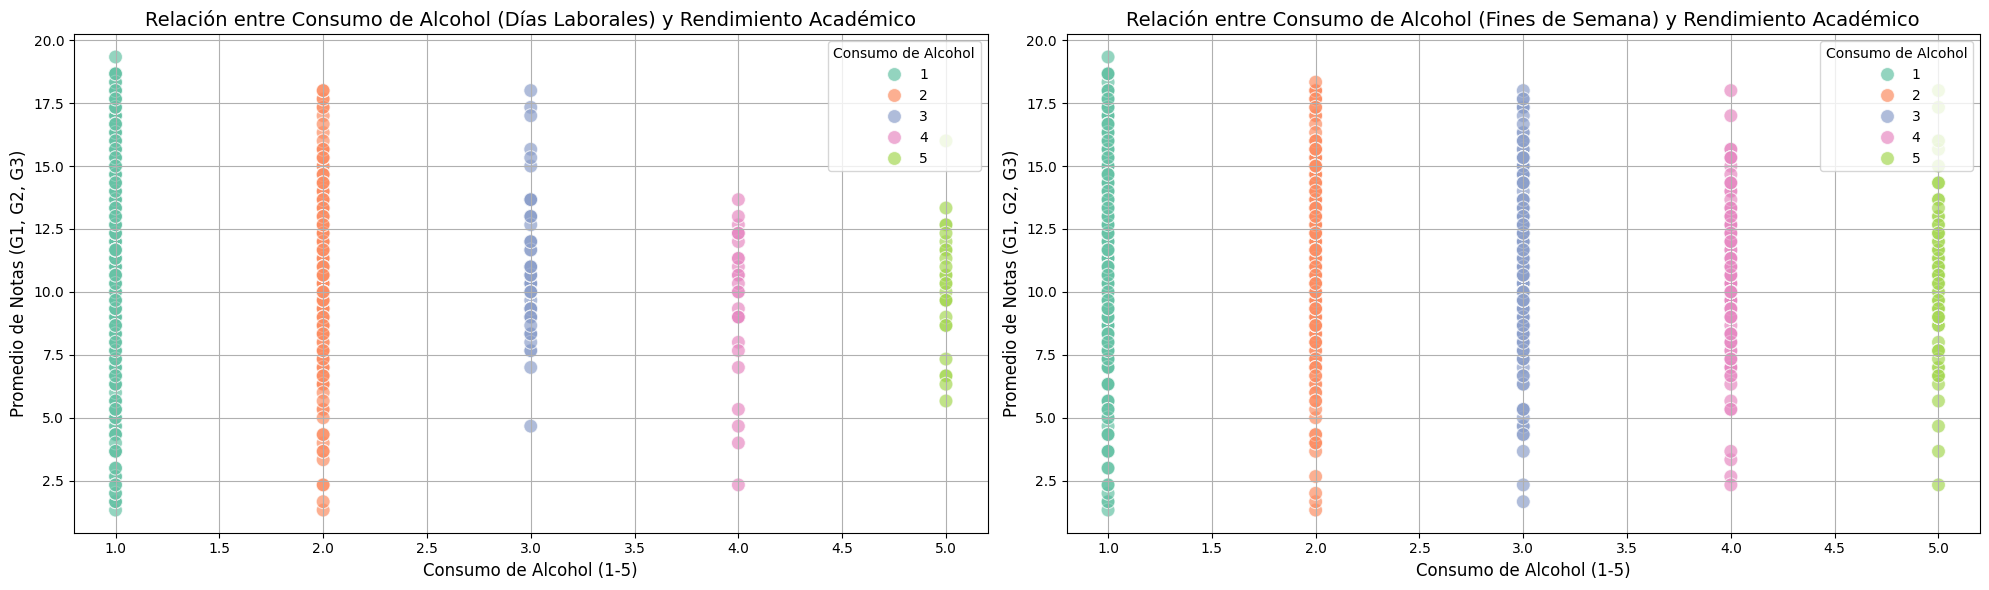

In [ ]:
df['GProm'] = df[['G1', 'G2', 'G3']].mean(axis=1)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico de dispersión para Dalc vs GProm
sns.scatterplot(data=df, x='Dalc', y='GProm', hue='Dalc', palette='Set2', s=100, alpha=0.7, ax=axes[0])
axes[0].set_title('Relación entre Consumo de Alcohol (Días Laborales) y Rendimiento Académico', fontsize=14)
axes[0].set_xlabel('Consumo de Alcohol (1-5)', fontsize=12)
axes[0].set_ylabel('Promedio de Notas (G1, G2, G3)', fontsize=12)
axes[0].legend(title='Consumo de Alcohol', loc='upper right')
axes[0].grid(True)

# Gráfico de dispersión para Walc vs GProm
sns.scatterplot(data=df, x='Walc', y='GProm', hue='Walc', palette='Set2', s=100, alpha=0.7, ax=axes[1])
axes[1].set_title('Relación entre Consumo de Alcohol (Fines de Semana) y Rendimiento Académico', fontsize=14)
axes[1].set_xlabel('Consumo de Alcohol (1-5)', fontsize=12)
axes[1].set_ylabel('Promedio de Notas (G1, G2, G3)', fontsize=12)
axes[1].legend(title='Consumo de Alcohol', loc='upper right')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 4. Distribución del consumo de alcohol por edad

**Propósito:** Ambos boxplots nos permitirán ver la mediana, los cuartiles y los valores atípicos (outliers) de consumo de alcohol, proporcionando una visión clara de cómo varía el consumo en diferentes grupos etarios.

**Análisis:**

* Hay una tendencia de aumento en el consumo conforme se incrementa la edad.

* Los estudiantes de mayor edad tienden a consumir más alcohol en fines de semana.

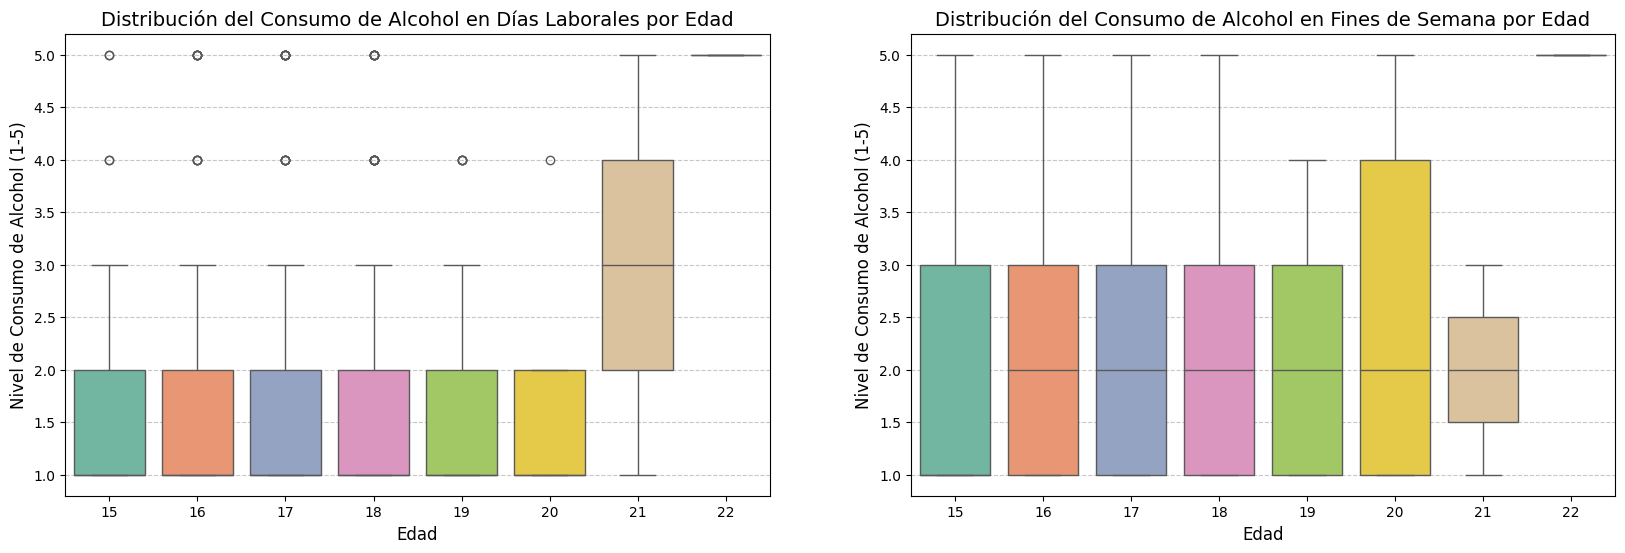

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax=axes[0], data=df, x='age', y='Dalc', hue='age', palette='Set2', legend=False)
axes[0].set_title("Distribución del Consumo de Alcohol en Días Laborales por Edad", fontsize=14)
axes[0].set_xlabel("Edad", fontsize=12)
axes[0].set_ylabel("Nivel de Consumo de Alcohol (1-5)", fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.boxplot(ax=axes[1], data=df, x='age', y='Walc', hue='age', palette='Set2', legend=False)
axes[1].set_title("Distribución del Consumo de Alcohol en Fines de Semana por Edad", fontsize=14)
axes[1].set_xlabel("Edad", fontsize=12)
axes[1].set_ylabel("Nivel de Consumo de Alcohol (1-5)", fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 5. Consumo de alcohol por tipo de residencia

**Propósito:** Comparar el consumo de alcohol entre estudiantes que viven en áreas urbanas y rurales. Al observar los patrones de consumo en ambos contextos, podemos identificar si existen diferencias significativas en los niveles de consumo de alcohol entre estos dos grupos. Este análisis puede ser útil para comprender cómo el entorno geográfico de los estudiantes (rural o urbano) podría influir en sus hábitos de consumo.

**Análisis:**
* Se espera que los estudiantes que viven en áreas urbanas puedan tener mayor acceso a lugares de socialización, fiestas o bares, lo que podría correlacionarse con un mayor consumo de alcohol.
* Por otro lado, los estudiantes rurales pueden tener un acceso más limitado a estos entornos, lo que podría traducirse en un consumo de alcohol más moderado. Sin embargo, este patrón puede variar dependiendo de diversos factores como la cultura local, la disponibilidad de recursos y la presión social.

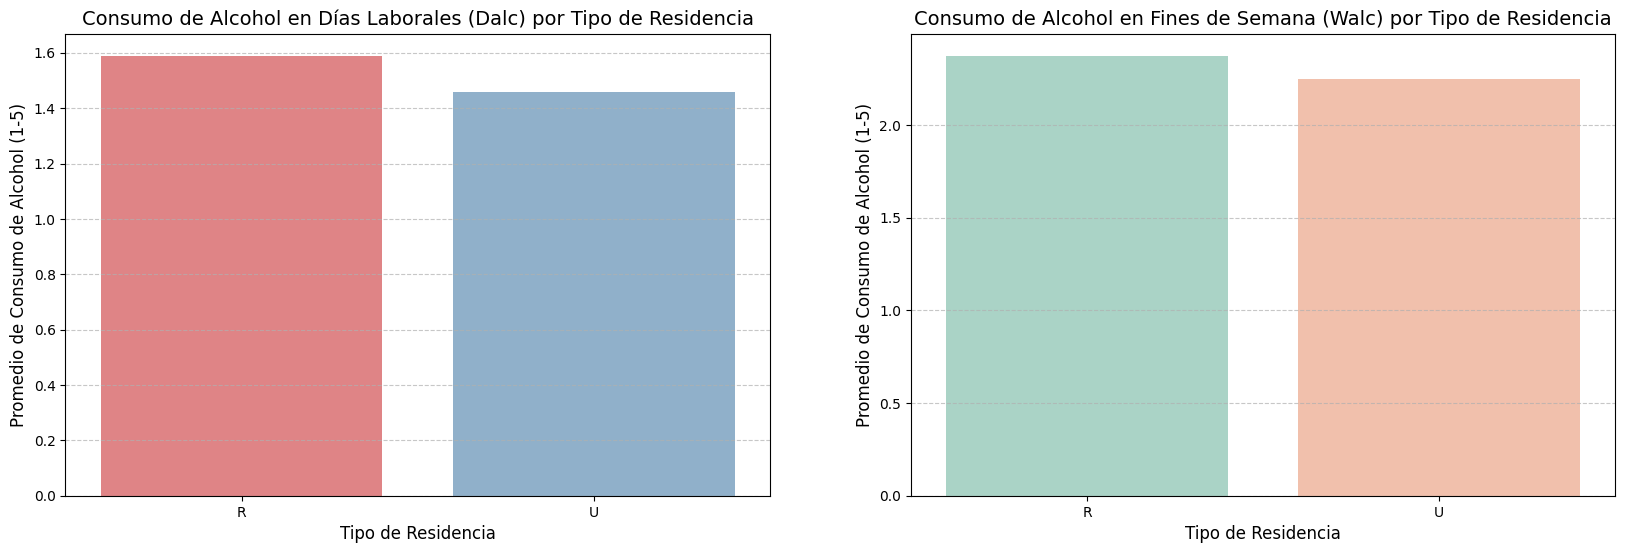

In [ ]:
df_rural_urbano = df.groupby('address')[['Dalc', 'Walc']].mean().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico para Dalc
sns.barplot(data=df_rural_urbano, x='address', y='Dalc', palette='Set1', alpha=0.6, errorbar=None, hue='address', dodge=False, legend=False, ax=axes[0])
axes[0].set_title('Consumo de Alcohol en Días Laborales (Dalc) por Tipo de Residencia', fontsize=14)
axes[0].set_xlabel('Tipo de Residencia', fontsize=12)
axes[0].set_ylabel('Promedio de Consumo de Alcohol (1-5)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico para Walc
sns.barplot(data=df_rural_urbano, x='address', y='Walc', palette='Set2', alpha=0.6, errorbar=None, hue='address', dodge=False, legend=False, ax=axes[1])
axes[1].set_title('Consumo de Alcohol en Fines de Semana (Walc) por Tipo de Residencia', fontsize=14)
axes[1].set_xlabel('Tipo de Residencia', fontsize=12)
axes[1].set_ylabel('Promedio de Consumo de Alcohol (1-5)', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### 6. Relación entre tiempo de estudio semanal y consumo de alcohol

**Propósito:** Explorar si existe alguna relación entre el tiempo de estudio semanal de los estudiantes (studytime) y el consumo de alcohol, tanto en días laborales (Dalc) como en fines de semana (Walc). Este análisis puede ayudar a entender si los estudiantes que dedican más tiempo al estudio tienden a consumir menos alcohol, o si el consumo de alcohol está asociado con un menor tiempo de estudio.

**Análisis:**
* El gráfico muestra una concentración de puntos más cercanos al nivel bajo de consumo (1 o 2) para los estudiantes que dedican más tiempo al estudio, podemos sugerir que los estudiantes más comprometidos con el estudio tienden a consumir menos alcohol durante la semana.
* Los fines de semana generalmente muestran una mayor variabilidad en el consumo de alcohol. Los estudiantes con menos tiempo de estudio tienden a consumir más alcohol, podría estar asociado a comportamientos sociales o a la falta de estructura en su rutina durante el fin de semana.
* En general, el patrón puede ser que los estudiantes que dedican menos tiempo a estudiar disfrutan de más tiempo libre durante el fin de semana y, por lo tanto, consumen más alcohol.

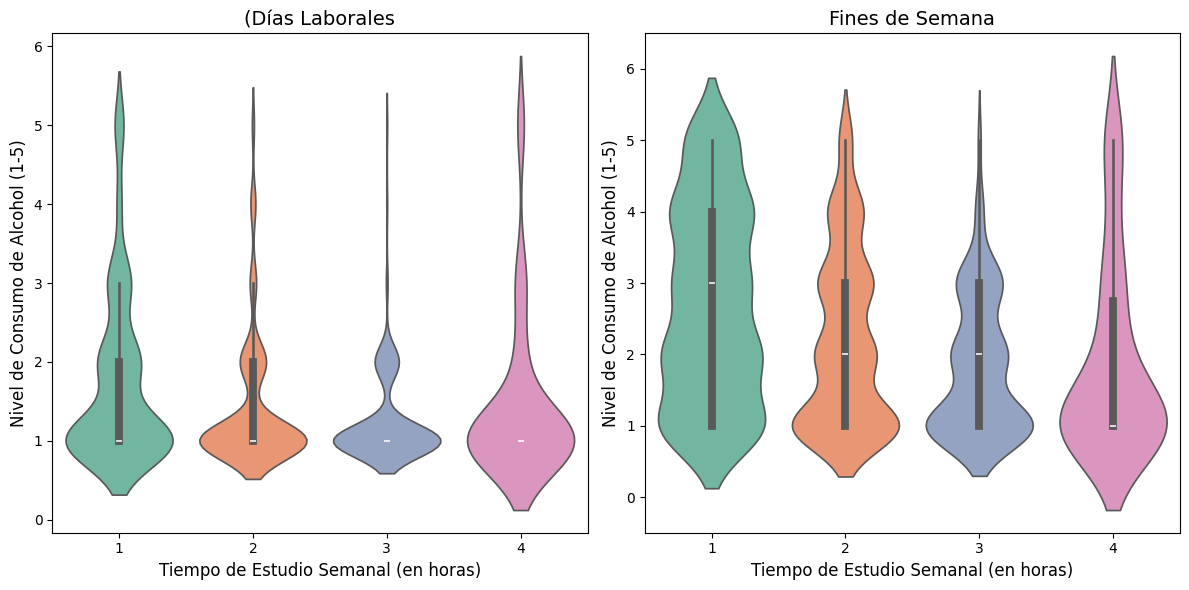

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='studytime', y='Dalc', data=df, hue='studytime', palette='Set2', legend=False)
plt.title("(Días Laborales", fontsize=14)
plt.xlabel('Tiempo de Estudio Semanal (en horas)', fontsize=12)
plt.ylabel('Nivel de Consumo de Alcohol (1-5)', fontsize=12)

# Walc (consumo de alcohol en fines de semana)
plt.subplot(1, 2, 2)
sns.violinplot(x='studytime', y='Walc', data=df, hue='studytime', palette='Set2', legend=False)
plt.title("Fines de Semana", fontsize=14)
plt.xlabel('Tiempo de Estudio Semanal (en horas)', fontsize=12)
plt.ylabel('Nivel de Consumo de Alcohol (1-5)', fontsize=12)

plt.tight_layout()
plt.show()

### 7. Tendencia del Consumo de Alcohol a lo Largo del Año

**Propósito:** Analizar cómo varía el consumo de alcohol en diferentes periodos del año, identificando patrones estacionales o comportamientos recurrentes.
**Análisis**:
* Se observa un aumento significativo en ciertas semanas, se podría investigar qué eventos o factores impulsaron ese comportamiento.
* El gráfico muestra una disminución y aumento general del consumo a lo largo del año, podría indicar cambios en la cultura social, las preferencias de bebidas o la efectividad de las políticas públicas.
* Se podría correlacionar el consumo de alcohol con variables externas, como el clima, eventos nacionales o internacionales, o incluso medidas de restricción social.

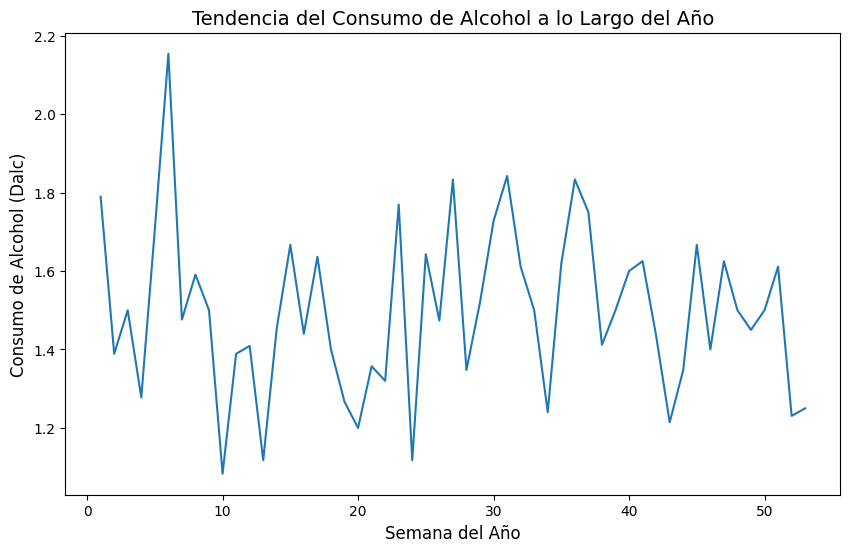

In [ ]:
df['Semana_Año'] = df['Fecha'].dt.isocalendar().week
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Semana_Año', y='Dalc', errorbar=None)
plt.title('Tendencia del Consumo de Alcohol a lo Largo del Año', fontsize=14)
plt.xlabel('Semana del Año', fontsize=12)
plt.ylabel('Consumo de Alcohol (Dalc)', fontsize=12)
plt.show()

### 8. Proporción de Estudiantes con Consumo de Alcohol por Relación Romántica

**Propósito:** Visualizar si existe alguna diferencia en el consumo de alcohol entre los estudiantes que tienen una relación romántica y los que no.

n es el nivel de la cantidad de alcohol que ingiere. Por ejemplo: usando el interactive slider lo posicionamos en 2, esto quiere decir que la proporción de estudiantes que tienen o no pareja y consumen alcohol de nivel tipo 2 son el gráfico generado al correr nuevamente esta casilla.

**Análisis:**
* Una mayor proporción de estudiantes con relación romántica consume alcohol, esto podría sugerir que los estudiantes en relaciones románticas tienden a socializar más y, por lo tanto, podrían estar más expuestos al consumo de alcohol.
* El consumo de alcohol podría estar relacionado con la vida social, ya que los estudiantes en relaciones románticas podrían estar participando en actividades sociales donde el alcohol es más accesible.
* El gráfico muestra una gran diferencia en el consumo de alcohol entre los dos grupos (con y sin relación romántica), esto podría abrir la puerta a estudios más profundos sobre cómo las relaciones interpersonales afectan los hábitos sociales de los estudiantes. Se podrían hacer hipótesis sobre las diferencias en el comportamiento social entre los grupos, y también estudiar si existen factores específicos dentro de las relaciones románticas que influyan en el consumo.

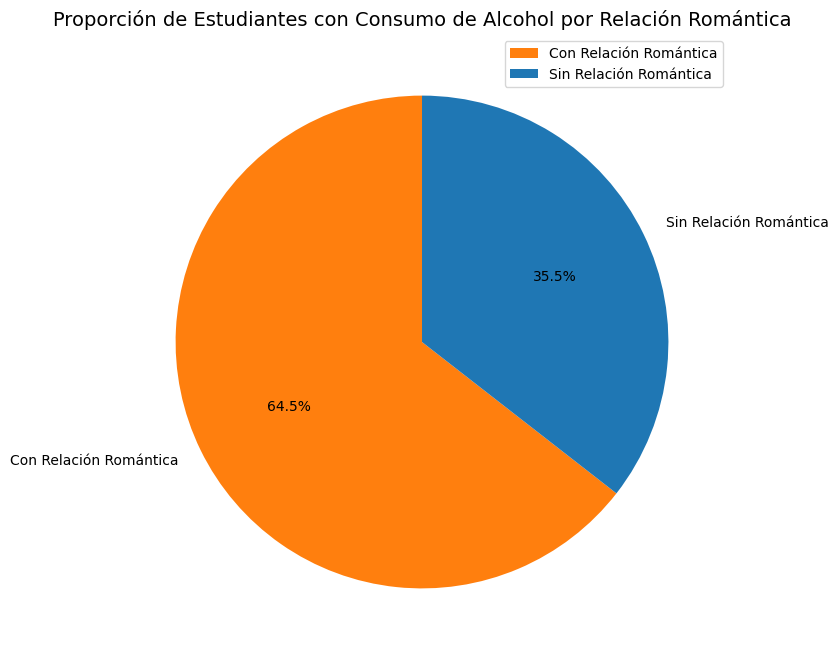

In [ ]:
n = 2 #@param {type:"slider", min:1, max:5, step:1}
df_alcohol = df[(df['Dalc'] >= 2) | (df['Walc'] >= n)]

# Realizamos la agrupación por relación romántica
alcohol_romantic = df_alcohol['romantic'].value_counts()

# Graficamos el resultado en un gráfico de pastel
plt.figure(figsize=(8, 8))
alcohol_romantic.plot(kind='pie', autopct='%1.1f%%', colors=['#ff7f0e', '#1f77b4'], startangle=90,
                      legend=True, labels=['Con Relación Romántica', 'Sin Relación Romántica'])
plt.title('Proporción de Estudiantes con Consumo de Alcohol por Relación Romántica', fontsize=14)
plt.ylabel('')
plt.show()

## Pruebas de hipótesis

Seleccionar dos variables cuantitativas del conjunto de datos para realizar pruebas de hipótesis. Las pruebas deben estar orientadas a comparar la muestra contra estadísticas poblacionales conocidas o supuestas.

### Hipótesis sobre las calificaciones
En el informe PISA 2018, los estudiantes portugueses obtuvieron los siguientes puntajes en promedio  de 567 puntos en una escala de 0 a 800. Con esto, se puede hacer una aproximación de una media académica en la escala de 0 a 20 teniendo un aproximado de 11.675 puntos. Se establece la hipotesis de que los estudiantes tienen una media en sus calificaciones finales inferior a la presentada en el informe.

Establecer la hipotesis:
$$ H_0: \mu \leq 11.675 $$
$$ H_a: \mu \lt 11.675 $$

Hipótesis nula ($H_0$): La media de las calificaciones finales es mayor o igual a 11.675.

Hipótesis alternativa ($H_a$): La media de las calificaciones finales es menor de 11.675

<br>

Se establece un valor de significancia $ α = 0.01 $

La media muestral es $\bar{x} = 11.342 $ y la desviación estandar muestral es $s = 3.864 $ con un tamaño de muestra $n=1044$

Estadístico de prueba: $$ T = \frac{\bar{x} - \mu}{s / \sqrt{n}} = \frac{11.342 - 11.675}{3.864 / \sqrt{1044}} = -2.78$$

Valor del estadístico de prueba
$T =-2.78$

Valor crítico
$T_{0.01,1043}=-2.3263$


Dado que $-2.78<-2.3263$ rechazamos la hipótesis nula.

<strong>Conclusión:</strong> Con un nivel de significancia de 0.01 hay suficiente evidencia para rechazar la hipotesis nula y concluir con un 99% de confianza, que la media de calificaciones finales es significativamente menor que la presentada en el Informe PISA.

In [ ]:
print(f"La media de la nota final G3 de todo el conjunto de datos es: {df['G3'].mean()}")

La media de la nota final G3 de todo el conjunto de datos es: 11.341954022988507


In [ ]:
print(f"La desviación estándar de la nota final G3 de todo el conjunto de datos es: {df['G3'].std()}")

La desviación estándar de la nota final G3 de todo el conjunto de datos es: 3.864795804383605


### Hipótesis sobre inasistencias
Según un estudio por el Ministerio de Educación y Formación, un estudiante en Portugal falla en promedio 4 veces en un periodo académico. La hipótesis es que los estudiantes estudiados fallan en promedio mas veces que la media general.

Establecer la hipotesis:
$$ H_0: \mu \leq 4 $$
$$ H_a: \mu \gt 4 $$

Hipótesis nula ($H_0$): El promedio de inasistencias es menor o igual a 4.

Hipótesis alternativa ($H_a$): El promedio de inasistencias es mayor a 4.

<br>

Se establece un valor de significancia $ α = 0.05 $

La media muestral es $\bar{x} = 4.43 $ y la desviación estandar muestral es $s = 6.3 $ con un tamaño de muestra $n=1044$

Estadístico de prueba: $$ T = \frac{\bar{x} - \mu}{s / \sqrt{n}} = \frac{4.43 - 4}{6.3 / \sqrt{1044}} = 2.2$$

Valor del estadístico de prueba
$T =2.2$

Valor crítico:
$T_{α, n-1} = 1.6449$


Dado que $ 2.2 > 1.6449 $ rechazamos la hipótesis nula.

<strong>Conclusión:</strong> Hay evidencia suficiente para afirmar que los estudiantes en esta muestra fallan en promedio más veces que la media general de 4 veces, según el nivel de significancia del 5%.

In [ ]:
print(f"The mean of absences is: {df['absences'].mean()}")

The mean of absences is: 4.434865900383142


In [ ]:
print(f"The standard deviation of absences is: {df['absences'].std()}")

The standard deviation of absences is: 6.210016564763466


## Prueba de normalidad

### Prueba mediante el grafico Q-Q
El grafico QQ o «cuantil cuantil» se puede usar para determinar si un conjunto de datos proviene o no de alguna distribución teórica, como la normal. Este tipo de gráfica proporciona una manera facil de verificar visualmente si el conjunto de datos sigue este tipo de distribución.


**Ejes del gráfico:**
* El eje horizontal muestra los cuantiles de la distribución normal
* El eje vertical muestra los cuantiles del conjunto de datos.


**Interpretación:**
* Si los datos siguen la distribución normal, los puntos del gráfico caerán aproximadamente sobre una línea recta.
Las desviaciones de esta línea indican diferencias entre la distribución de los datos y la distribución esperada.


### Prueba de Shapiro-Wilk
La prueba de Shapiro-Wilk es un test estadístico que se utiliza para verificar si un conjunto de datos sigue una distribución normal. Es particularmente útil en análisis estadísticos donde se requiere que los datos cumplan con este supuesto, como en pruebas paramétricas.

**Hipótesis nula (H0):** Los datos siguen una distribución normal.

**Hipótesis alternativa (Ha):** Los datos no siguen una distribución normal.

**Estadístico W:** Mide cuán bien los datos se ajustan a una distribución normal. Un valor cercano a 1 indica un buen ajuste.

**p-valor:** Si es menor que un umbral (usualmente 0.05), se rechaza la hipótesis nula, indicando que los datos no son normales.

La prueba compara la distribución de los datos con una distribución normal ideal del mismo tamaño. Si hay una gran desviación, el estadístico W disminuye y el p-valor será bajo, lo que indica que los datos no son normales.

**Ventajas:**
Es más sensible para detectar desviaciones de la normalidad en muestras pequeñas (n<50), aunque también puede aplicarse a muestras más grandes.

**Limitaciones:**
En muestras muy grandes ( n>5000), casi cualquier desviación de la normalidad puede ser detectada, incluso si no tiene relevancia práctica.

### Prueba de Kolmogórov-Smirnov

La prueba de Kolmogórov-Smirnov (KS) es otra prueba estadística que evalúa si un conjunto de datos sigue una distribución específica, como la distribución normal. Es más general que la prueba de Shapiro-Wilk, ya que puede aplicarse a diferentes tipos de distribuciones, no solo a la normal.

**Hipótesis nula (H0):** Los datos siguen la distribución especificada (por ejemplo, normal).

**Hipótesis alternativa (Ha):** Los datos no siguen la distribución especificada.

**Estadístico KS:** Mide la máxima diferencia entre la función de distribución acumulada empírica de los datos (Fn(x)) y la función de distribución acumulada teórica (F(x)) de la distribución especificada.
Mientras menor sea esta diferencia, más probable es que los datos sigan la distribución especificada.

**p-valor:** Determina si la diferencia observada es estadísticamente significativa. Si el p-valor es menor que un umbral (por ejemplo,
0.05), se rechaza la hipótesis nula.

La prueba compara la función de distribución acumulada de los datos con la de una distribución teórica especificada y evalúa la discrepancia máxima.

**Ventajas:**
Puede aplicarse a cualquier distribución, no solo la normal.
Útil para comparar un conjunto de datos con una distribución teórica específica.

**Limitaciones:**
Sensible a valores atípicos.
No es adecuada para datos categóricos o discretos.


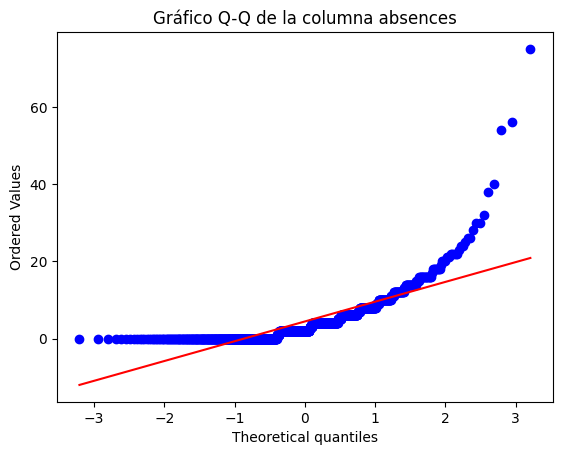

In [ ]:
#@title Gráfica Q-Q de 'absences'
data = df['absences'].dropna()

stats.probplot(data, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de la columna absences")
plt.show()

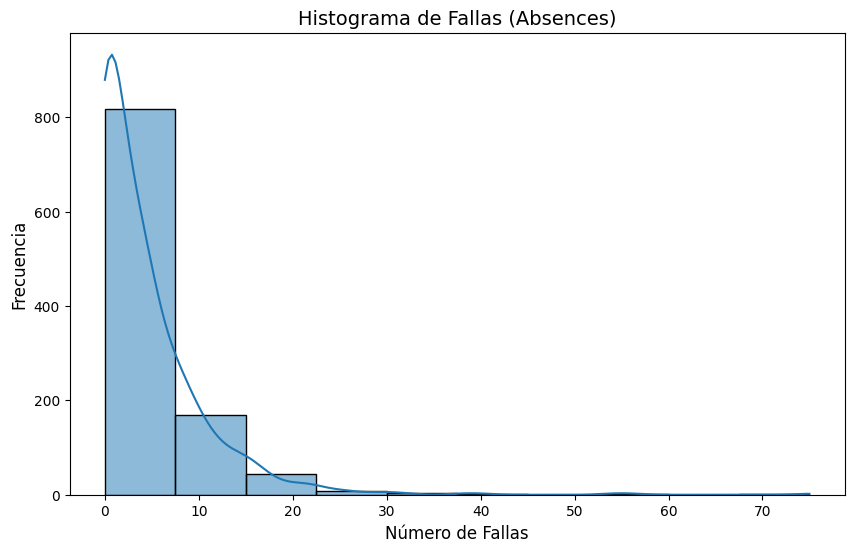

In [ ]:
#@title Histograma de absences
plt.figure(figsize=(10, 6))
sns.histplot(df['absences'], bins=10, kde=True)
plt.title('Histograma de Fallas (Absences)', fontsize=14)
plt.xlabel('Número de Fallas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

In [ ]:
#@title Prueba de Shapiro-Wilk para absences
shapiro_test = shapiro(df['absences'])

print(f"Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

alpha = 0.05
if shapiro_test.pvalue > alpha:
    print("Los datos siguen una distribución normal (No rechaza H0)")
else:
    print("Los datos no siguen una distribución normal (Rechaza H0)")

Statistic: 0.6797911696373994
P-value: 1.8407079431468013e-40
Los datos no siguen una distribución normal (Rechaza H0)


In [ ]:
#@title Prueba de Kolmogorov-Smirnov para absences
mean_absences = df['absences'].mean()
std_absences = df['absences'].std()

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(df['absences'], 'norm', args=(mean_absences, std_absences))

print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value > alpha:
    print("Los datos siguen una distribución normal (No rechaza H0)")
else:
    print("Los datos no siguen una distribución normal (Rechaza H0)")

Kolmogorov-Smirnov test statistic: 0.2375680831011739
P-value: 2.5198961761346563e-52
Los datos no siguen una distribución normal (Rechaza H0)


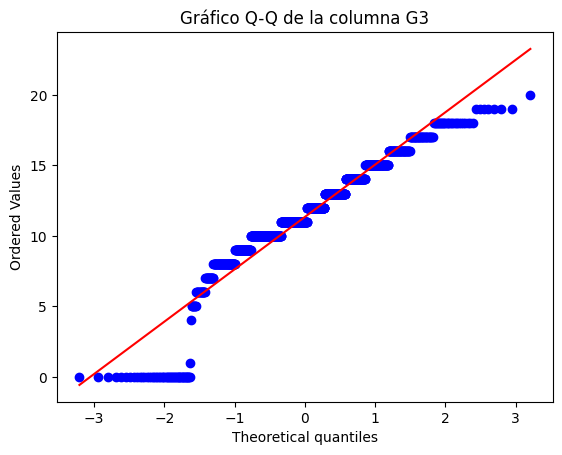

In [ ]:
#@title Gráfica Q-Q la columna 'G3'
data = df['G3'].dropna()

stats.probplot(data, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de la columna G3")
plt.show()

El grafico anterior sugiere que los que los datos de la columna de notas finales G3 podria aproximarse a una distribución normal, aunque no perfectamente, especialmente por la cola de los datos, que no se ajustan perfectamente.

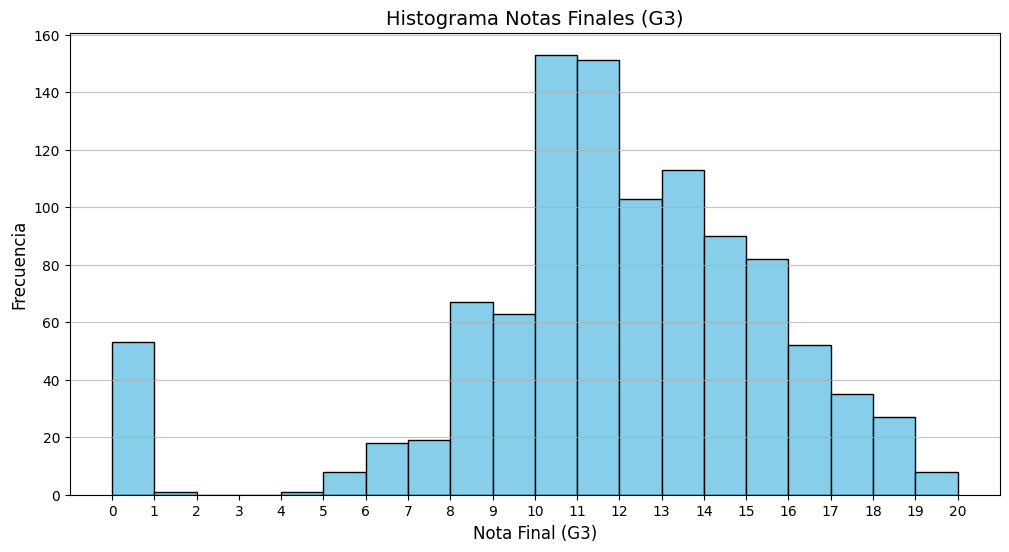

In [ ]:
#@title Histograma de notas finales G3
plt.figure(figsize=(12, 6))
plt.hist(df['G3'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Nota Final (G3)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma Notas Finales (G3)', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, 21))
plt.show()

In [ ]:
#@title Prueba de Shapiro-Wilk para G3
stat, p = shapiro(df['G3'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Ejemplo es Gaussian (No rechaza H0)')
else:
	print('Ejemplo no es Gaussian (Rechaza H0)')

Statistics=0.918, p=0.000
Ejemplo no es Gaussian (Rechaza H0)


In [ ]:
#@title Prueba de Kolmogorov-Smirnov para G3
mean_G3 = df['G3'].mean()
std_G3 = df['G3'].std()

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(df['G3'], 'norm', args=(mean_G3, std_G3))

print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value > alpha:
    print("Los datos siguen una distribución normal (No rechaza H0)")
else:
    print("Los datos no siguen una distribución normal (Rechaza H0)")

Kolmogorov-Smirnov test statistic: 0.14390460274343916
P-value: 2.495251174786714e-19
Los datos no siguen una distribución normal (Rechaza H0)


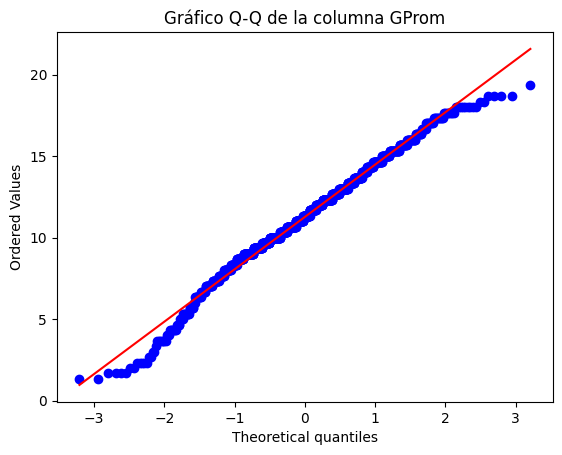

In [ ]:
#@title Gráfica Q-Q la columna 'GProm'
data = df['GProm'].dropna()

stats.probplot(data, dist="norm", plot=plt)
plt.title("Gráfico Q-Q de la columna GProm")
plt.show()

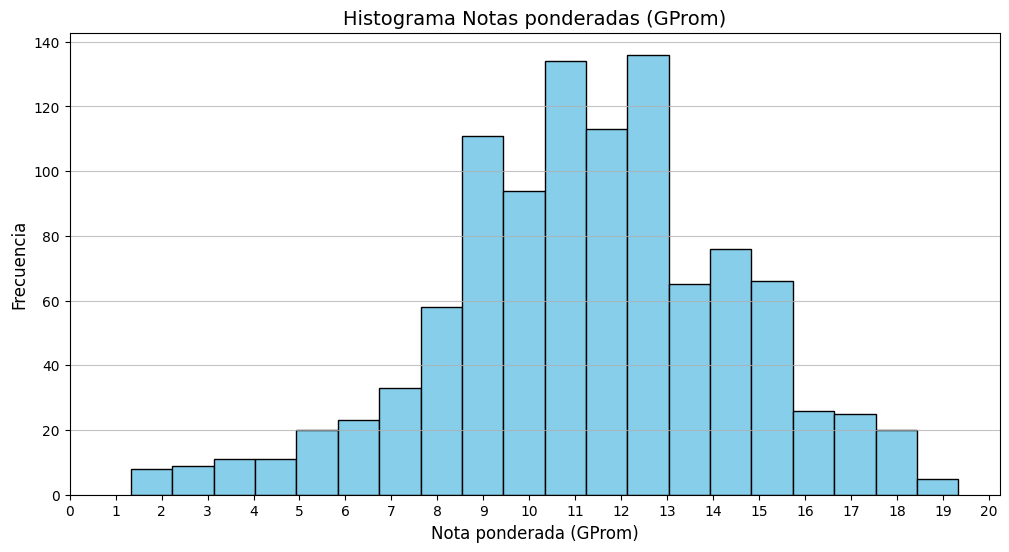

In [ ]:
#@title Histograma de notas finales GProm
plt.figure(figsize=(12, 6))
plt.hist(df['GProm'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Nota ponderada (GProm)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma Notas ponderadas (GProm)', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(0, 21))
plt.show()

In [ ]:
#@title Prueba de Shapiro-Wilk para GProm
stat, p = shapiro(df['GProm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Ejemplo es Gaussian (No rechaza H0)')
else:
	print('Ejemplo no es Gaussian (Rechaza H0)')

Statistics=0.990, p=0.000
Ejemplo no es Gaussian (Rechaza H0)


In [ ]:
#@title Prueba de Kolmogorov-Smirnov para GProm
mean_GProm = df['GProm'].mean()
std_GProm = df['GProm'].std()

# Perform the Kolmogorov-Smirnov test
ks_statistic, p_value = kstest(df['GProm'], 'norm', args=(mean_GProm, std_GProm))

print(f"Kolmogorov-Smirnov test statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value > alpha:
    print("Los datos siguen una distribución normal (No rechaza H0)")
else:
    print("Los datos no siguen una distribución normal (Rechaza H0)")

Kolmogorov-Smirnov test statistic: 0.049987048171005966
P-value: 0.010469541898449165
Los datos no siguen una distribución normal (Rechaza H0)


## Limitaciones del análisis

**1. Tamaño y representatividad del dataset:** El dataset de Kaggle se centra en un grupo específico de estudiantes de dos escuelas en Portugal. Esto limita la generalización a estudiantes de otras regiones, culturas o sistemas educativos.

**2. Sesgo de autoinforme:** Variables como el consumo de alcohol (Dalc y Walc) son autoinformadas y pueden estar sujetas a sesgo de respuesta, ya sea por presión social o por inexactitud.

**3. Variables omitidas:** Factores externos como el entorno social, la situación económica familiar o influencias culturales no están presentes en el dataset, pero podrían influir significativamente en el consumo de alcohol.

**4. Distribuciones limitadas:** Las variables objetivo (Dalc y Walc) tienen un rango discreto de 1 a 5, lo que puede limitar la capacidad de los modelos para capturar relaciones más complejas.

**5. Imbalance en clases:** Si las categorías de consumo de alcohol no están distribuidas uniformemente, esto puede sesgar los modelos predictivos hacia las categorías más representadas.

**6. Relaciones superficiales:** Aunque se analizaron correlaciones y relaciones entre variables, no se realizaron análisis más profundos que expliquen causalidad, solo correlación.

**7. Simplicidad de los modelos predictivos:** El modelo de clasificación Random Forest es robusto, pero no necesariamente captura las interacciones complejas entre las características. Además, el uso de hiperparámetros predeterminados limita su rendimiento.

**8. Datos categóricos tratados de forma básica:** Variables como school, Mjob, Fjob, y reason fueron codificadas sin considerar relaciones jerárquicas o semánticas, lo que podría llevar a una pérdida de información.

**9. Falta de validación externa:** Las implementaciones no se probaron en datasets externos, por lo que no se garantiza su rendimiento fuera del conjunto de datos proporcionado.

**10. Modelo único para Dalc y Walc:** El análisis no distinguió entre las posibles diferencias en los factores que afectan el consumo de alcohol en días laborales y fines de semana.


## Posibles mejoras del análisis

**1. Expansión del dataset:** Complementar con datos de otras escuelas, países o estudios longitudinales para aumentar la generalización y diversidad del análisis.

**2. Incorporación de datos externos:** Agregar variables relacionadas con la economía familiar, el entorno social y datos geográficos para enriquecer el análisis.

**3. Preprocesamiento avanzado:** Utilizar técnicas de ingeniería de características más avanzadas, como embeddings para variables categóricas, para preservar información semántica.

**4. Balanceo de clases:** Aplicar técnicas como sobremuestreo (SMOTE) o submuestreo para manejar posibles desbalances en las clases objetivo.

**5. Modelos más sofisticados:** Experimentar con modelos como Gradient Boosting (XGBoost, LightGBM) o redes neuronales para capturar relaciones más complejas.

**6. Análisis causal:** Implementar métodos como gráficos causales o modelos estructurales para identificar relaciones causales entre las variables.

**7. Hiperparámetros optimizados:** Realizar una búsqueda exhaustiva o aleatoria para ajustar los hiperparámetros del modelo Random Forest y otros algoritmos utilizados.

**8. Validación cruzada:** Implementar k-fold cross-validation para obtener una mejor estimación del rendimiento de los modelos.

**9. Separación de Dalc y Walc:** Crear modelos independientes para predecir el consumo de alcohol en días laborales y fines de semana, ya que los factores subyacentes pueden diferir.

**10. Análisis temporal:** Usar la columna Fecha para explorar patrones temporales en el consumo de alcohol (como estacionalidad o efectos de exámenes).

**11. Visualización mejorada:** Incluir gráficos interactivos para explorar dinámicamente las relaciones entre variables y facilitar la comunicación de resultados.

**12. Interpretabilidad del modelo:** Implementar técnicas como SHAP (SHapley Additive ExPlanations) para entender mejor las contribuciones de cada característica en las predicciones del modelo.

**13. Evaluación en datos externos:** Validar los modelos en un dataset independiente o recopilar nuevos datos para evaluar su capacidad de generalización.

**14. Análisis cualitativo:** Complementar con encuestas o estudios cualitativos que exploren actitudes y motivaciones detrás del consumo de alcohol.

**15. Clusterización previa:** Identificar grupos de estudiantes con características similares mediante técnicas como K-Means o DBSCAN para desarrollar modelos específicos por grupo.

## Referencias



1. Student alcohol consumption. (2016, 19 octubre). Kaggle. https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?form=MG0AV3
2. De Medeiros, P. F. P., Valente, J. Y., Rezende, L. F. M., & Sanchez, Z. M. (2022). Binge drinking in Brazilian adolescents: results of a national household survey. Cadernos de Saúde Pública, 38(12). https://doi.org/10.1590/0102-311xen077322
3. World Bank Open Data. (s. f.). World Bank Open Data. https://datos.bancomundial.org/indicador/SH.ALC.PCAP.LI?locations=BR&form=MG0AV3
4. Suhurt, M. A. A., Del Pilar Fresco, M., Suhurt, C. M. A., Ruoti, M., Capurro, M. H., Suhurt, C. A., & Ortiz, M. Á. F. (2021). Consumo abusivo de alcohol en estudiantes adolescentes. https://www.redalyc.org/journal/7037/703773710005/?form=MG0AV3
5. Más de la mitad de los mayores de 18 años consumen bebidas. (2021, 5 diciembre). Agência Brasil. https://agenciabrasil.ebc.com.br/es/saude/noticia/2021-12/mas-de-la-mitad-de-los-mayores-de-18-anos-consumen-bebidas-alcoholicas?form=MG0AV3
6. Relatório Brasil no PISA 2018. (2021, 29 junio). Instituto Nacional de Estudos E Pesquisas Educacionais Anísio Teixeira | Inep. https://www.gov.br/inep/pt-br/centrais-de-conteudo/acervo-linha-editorial/publicacoes-institucionais/avaliacoes-e-exames-da-educacao-basica/relatorio-brasil-no-pisa-2018?form=MG0AV3
7. PISA 2018 Results (Volume I) - OECD. https://www.oecd.org/en/publications/pisa-2018-results-volume-i_5f07c754-en.html?form=MG0AV3
8. PISA 2018 Results (Volume II) - OECD. https://www.oecd-ilibrary.org/education/pisa-2018-results-volume-ii_b5fd1b8f-en?form=MG0AV3
9. Students’ academic expectations, PISA 2018. (s. f.). https://www.oecd-ilibrary.org/education/students-academic-expectations-pisa-2018_06906954-en?form=MG0AV3


